In [1]:
import random
from tictactoe import TicTacToe
from player import qlearn, random_player, mcs, dqn, alphazero, alphabeta


def play(com1, com2, env):
    while True:        
        if env.is_first_player():
            action = com1.take_action()
        else:
            action = com2.take_action()
        env.put(action)

        if (value := env.is_done()) is not None:
            break
        
        env.change_turn()
    return value * env.turn
    

In [4]:
episode = 1
path = r'player\qtable\table1.npy'
path2 = r"qnet\model1"
env = TicTacToe()
com1 = alphazero.AlphaZero(env)
com2 = alphabeta.AlphaBetaPlayer(env)
win_count = 0
win_rate = []

for i in range(1, episode + 1):
    if random.random() < 0:
        value = play(com1, com2, env)
        win_count += value if value > 0 else 0.5 if value == 0 else 0
    else:
        value = play(com2, com1, env)
        win_count += -value if value <= 0 else 0
    win_rate.append(win_count / i)
    print(env)
    env.reset()




OXX
OOO
_X_



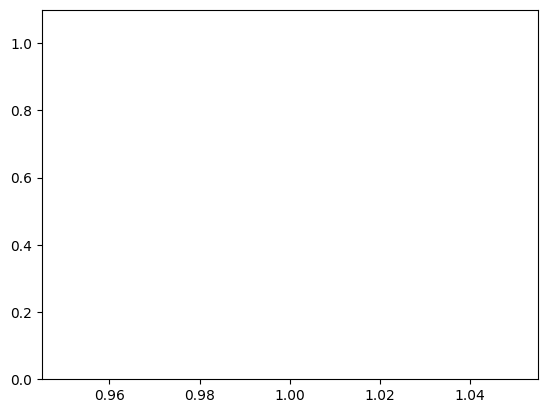

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(range(1, episode + 1), win_rate)
plt.ylim(0, 1.1)
plt.show()

